# Project Overview

By some accounts, in the St. Petersburg 1914 chess tournament, the title "Grandmaster" was formally conferred by Russian Tsar Nicholas II, who had partially funded the tournament. The Tsar reportedly awarded the title to the five finalists: Emanuel Lasker, José Raúl Capablanca, Alexander Alekhine, Siegbert Tarrasch, and Frank Marshall.

## Questions

1. Basic characteristics of Grandmasters
2. Observe geographical distribution 
3. Observe geographical distribution over time
4. First woman grandmaster 
5. Oldest in the top 1000 
6. Younguest grandmasters (over time)

# Imports

In [1]:
from bs4 import BeautifulSoup
import requests
import lxml

import pandas as pd
import matplotlib.pyplot as plt

import requests
import numpy as np

# Data Gathering

Scrape list of grandmasters, along with basic demographics, from Wikipedia.

This can easily be done with _pd.read_html()_ but was done as shown for practice. 

In [3]:
response = requests.get(url="https://en.wikipedia.org/wiki/List_of_chess_grandmasters")
page = response.text

In [4]:
soup = BeautifulSoup(page, "lxml")

In [5]:
# Table with relevant information 
table = soup.find("table", id="grandmasters")

In [6]:
# Get header info 

header_tag = table.find("tr")

In [224]:
print(header_tag.text)


Name
FIDE ID
Birthday
Birthplace
Died
TitleYear
Federation
Sex
Notes



In [7]:
headers = header_tag.text.split("\n")[1:-1]

In [8]:
# Get Grandmaster info

gm_tags = table.find_all('tr')[2:]

In [9]:
# Create DataFrame

data = {column_name: [] for column_name in headers}

gms_info = [tag.text.strip("\n").split("\n") for tag in gm_tags] 

for gm_info in gms_info:
    for item in list(zip(headers, gm_info)):
        data[item[0]].append(item[1]) 

gm_df = pd.DataFrame(data) 

gm_df.head()

,Name,FIDE ID,Born,Birthplace,Died,TitleYear,Federation,Sex,Notes
0,"Aagaard, Jacob",1401815,1973-07-31,Hørsholm,,2007,Denmark,M,Di Felice; title application; currently Scotland
1,"Abasov, Nijat",13402960,1995-05-14,Baku,,2011,Azerbaijan,M,Di Felice; title application
2,"Abbasifar, Hasan",12501000,1972-09-12,Shiraz,,2013,Iran,M,Di Felice; title application[note 1]
3,"Abbasov, Farid",13400665,1979-01-31,Baku,,2007,Azerbaijan,M,Di Felice; title application
4,"Abdumalik, Zhansaya",13703544,2000-01-12,Almaty,,2021,Kazakhstan,F,title application


In [10]:
gm_df.drop("Notes", axis=1, inplace=True)

# Data Exploration (Preliminary)

In [229]:
gm_df.shape

(1932, 8)

In [13]:
gm_df.info()   # Missing Values encoded as empty strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1939 non-null   object
 1   FIDE ID     1939 non-null   object
 2   Born        1939 non-null   object
 3   Birthplace  1939 non-null   object
 4   Died        1939 non-null   object
 5   TitleYear   1939 non-null   object
 6   Federation  1939 non-null   object
 7   Sex         1939 non-null   object
dtypes: object(8)
memory usage: 121.3+ KB


# Data Prepartions

In [14]:
gm_df[['Born', 'Died', 'TitleYear']] = gm_df[['Born', 'Died', 'TitleYear']].apply(pd.to_datetime)
gm_df.dtypes

Name                  object
FIDE ID               object
Born          datetime64[ns]
Birthplace            object
Died          datetime64[ns]
TitleYear     datetime64[ns]
Federation            object
Sex                   object
dtype: object

# Data Investigation

### Early Grandmasters

In [19]:
# Oldest Grandmasters in batch of First titles

first_year = gm_df.TitleYear.min() 

gm_df[gm_df.TitleYear == first_year].sort_values("Born")[:10]

,Name,FIDE ID,Born,Birthplace,Died,TitleYear,Federation,Sex
1111,"Mieses, Jacques",,1865-02-27,Leipzig,1954-02-23,1950-01-01,England,M
1069,"Maróczy, Géza",,1870-03-03,Szeged,1951-05-29,1950-01-01,Hungary,M
1465,"Rubinstein, Akiba",,1880-12-01,Stawiski,1961-03-15,1950-01-01,Poland,M
179,"Bernstein, Ossip",,1882-10-02,Zhytomyr,1962-11-30,1950-01-01,France,M
385,"Duras, Oldřich",,1882-10-30,Prague,1957-01-05,1950-01-01,Czecho­slovakia,M
1800,"Vidmar, Milan",,1885-06-22,Ljubljana,1962-10-09,1950-01-01,Yugoslavia,M
1700,"Tartakower, Savielly",,1887-02-21,Rostov-on-Don,1956-02-05,1950-01-01,France,M
877,"Kostić, Boris",,1887-02-24,Vršac,1963-11-03,1950-01-01,Yugoslavia,M
975,"Levenfish, Grigory",,1889-03-21,Petrokov,1961-02-09,1950-01-01,Soviet Union,M
587,"Grünfeld, Ernst",,1893-11-21,Vienna,1962-04-03,1950-01-01,Austria,M


In [233]:
(gm_df['Died'] < gm_df['TitleYear']).any()

False

After FIDE reorganized post WW2, the title of GM was given to 27 players total in 1950. Some of whom were currently the world's best, others who used to be. No posthumous titles were awarded - leaving out greats such as former world champions  Steinitz, Lasker, Capablanca, and Alekhine. 

### Age Characteristics 

The average age of new grandmasters over time 

In [21]:
gm_df["age"] = (gm_df.TitleYear - gm_df.Born)

age_over_time = gm_df.groupby('TitleYear').agg({'age':pd.Series.mean}).apply(lambda x: (x.dt.days/365))

age_over_time.head(3)

,age
TitleYear,
1950-01-01,48.794521
1951-01-01,44.843836
1952-01-01,30.353425


In [235]:
rolling_average = age_over_time["age"].rolling(3).mean()
rolling_average

TitleYear
1950-01-01          NaN
1951-01-01          NaN
1952-01-01    41.330594
1953-01-01    39.483105
1954-01-01    37.763470
                ...    
2017-01-01    22.610959
2018-01-01    22.669406
2019-01-01    22.953425
2020-01-01    23.315982
2021-01-01    21.971689
Name: age, Length: 71, dtype: float64

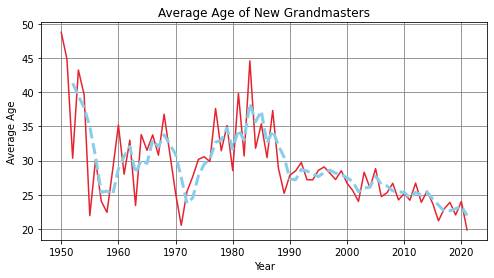

In [236]:
# Create nice line chart

plt.figure(figsize=(8, 4))
plt.title('Average Age of New Grandmasters')

plt.ylabel('Average Age')
plt.xlabel('Year')

plt.grid(color='grey')

plt.plot(age_over_time.index, age_over_time['age'], color='#E6232E')
plt.plot(rolling_average.index, rolling_average.values, color='skyblue', linestyle='dashed', linewidth = 3)

plt.show()

The number of titles awarded each year

In [237]:
number_titles = gm_df.groupby("TitleYear").agg({"Name":pd.Series.count}).rename({"Name":"Number of Titles"},axis=1)
number_titles.head()

,Number of Titles
TitleYear,
1950-01-01,27
1951-01-01,2
1952-01-01,6
1953-01-01,4
1954-01-01,5


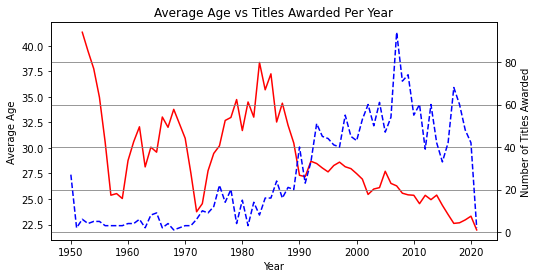

In [238]:
# Create nice line chart

plt.figure(figsize=(8, 4))
plt.title('Average Age vs Titles Awarded Per Year')

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Age')
ax2.set_ylabel('Number of Titles Awarded')


plt.grid(color='grey')

# ax1.plot(age_over_time.index, age_over_time['age'], color='#E6232E')

ax1.plot(rolling_average.index, rolling_average.values, 'r')
ax2.plot(number_titles.index, number_titles.values, '--b')

plt.show()

### Youngest Grandmaster Across Time

In [239]:
#Youngest Each Year

youngest_each_year = gm_df.sort_values(by=['TitleYear','age']).groupby('TitleYear').agg({'age':pd.Series.min})
youngest_each_year.head(3)

,age
TitleYear,
1950-01-01,9448 days
1951-01-01,10195 days
1952-01-01,8233 days


In [240]:
#Find index for current youngest at each year

indexer = [(youngest_each_year.loc[year] <= youngest_each_year[:year].min()).values[0] for year in youngest_each_year.index] #Boolean Array
ages_to_select = youngest_each_year[indexer].age.to_list()

In [241]:
youngest_grandmasters = gm_df[gm_df["age"].isin(ages_to_select)].drop_duplicates(subset=['age'])
youngest_grandmasters.sort_values('TitleYear')

,Name,FIDE ID,Birthday,Birthplace,Died,TitleYear,Federation,Sex,age
233,"Bronstein, David",4101359,1924-02-19,Belaya Tserkov,2006-12-05,1950-01-01,Soviet Union,M,9448 days
1317,"Petrosian, Tigran",,1929-06-17,Tbilisi,1984-08-13,1952-01-01,Soviet Union,M,8233 days
1618,"Spassky, Boris",600024,1937-01-30,Leningrad,NaT,1955-01-01,Russia,M,6545 days
453,"Fischer, Robert James (Bobby)",2000016,1943-03-09,Chicago,2008-01-17,1958-01-01,United States,M,5412 days
963,"Leko, Peter",703303,1979-09-08,Subotica,NaT,1994-01-01,Hungary,M,5229 days
116,"Bacrot, Étienne",605506,1983-01-22,Lille,NaT,1997-01-01,France,M,5093 days
1389,"Radjabov, Teimour",13400924,1987-03-12,Baku,NaT,2001-01-01,Azerbaijan,M,5044 days
785,"Karjakin, Sergey",14109603,1990-01-12,Simferopol,NaT,2003-01-01,Ukraine,M,4737 days
1194,"Negi, Parimarjan",5016690,1993-02-09,New Delhi,NaT,2006-01-01,India,M,4709 days
1364,Praggna­nandhaa R,25059530,2005-08-10,Chennai,NaT,2018-01-01,India,M,4527 days


### Grandmaster by Location

In [242]:
# Most Popular Countries 

gm_df['Federation'].value_counts().sort_values(ascending=False)[:10]

Russia           252
Ukraine          102
Soviet Union      97
United States     79
Germany           79
Hungary           66
India             66
Poland            51
China             50
Spain             48
Name: Federation, dtype: int64

In [25]:
country_counts = gm_df['Federation'].value_counts()
country_counts = pd.DataFrame(country_counts).reset_index().rename({'index':'Country','Federation':'Count'}, axis=1)
country_counts.head()

,Country,Count
0,Russia,252
1,Ukraine,102
2,Soviet Union,97
3,Germany,79
4,United States,79


In [23]:
# Get Country Codes 

def get_country_code(country):
    
    URL = f"https://restcountries.eu/rest/v2/name/{country}"
    response = requests.get(url=URL)
    if response.status_code == 200:
        data = response.json()
        # If only one name found 
        if len(data) == 1:
            return data[0]["alpha3Code"]
        
        # If multiple found 
        else:
            URL = f"https://restcountries.eu/rest/v2/name/{country}/?fullText=True"
            response = requests.get(url=URL)
            
            if response.status_code == 200:
                data = response.json()
                return data[0]['alpha3Code']
            
            else:
                return "multiple partial matches"
                
    else:
        return np.nan
        

In [26]:
country_counts['Locations'] = country_counts.Country.map(get_country_code)

In [27]:
country_counts[country_counts['Locations'].isin([np.nan, "multiple partial matches"])]

,Country,Count,Locations
2,Soviet Union,97,NaN
4,United States,79,multiple partial matches
11,Yugoslavia,45,NaN
13,England,43,NaN
29,Iran,17,multiple partial matches
39,West Germany,13,NaN
45,Czecho­slovakia,11,NaN
50,North Macedonia,8,NaN
64,Scotland,5,NaN
66,East Germany,4,NaN


In [28]:
mapping = {
    "Country": {
        "United States": "United States of America",
        "England": "United Kingdom of Great Britain and Northern Ireland",
        "Iran": "Iran (Islamic Republic of)",
        
        "Serbia and Montenegro": "Serbia", 
        "Yugoslavia": "Serbia", 
        "West Germany": "Germany", 
        "East Germany": "Germany", 
        "Soviet Union": "Russia"
    }
}

country_counts = country_counts.replace(mapping)
country_counts = country_counts.groupby("Country",).agg({"Count":pd.Series.sum, "Locations":pd.Series.sample}).reset_index()

In [29]:
for country in ["United States of America","United Kingdom of Great Britain and Northern Ireland","Iran (Islamic Republic of)"]:
    country_counts.loc[country_counts["Country"]==country,'Locations'] = get_country_code(country)        

In [246]:
# Create geographic map of World

In [32]:
# import plotly.express as px

# fig = px.choropleth(data_frame=country_counts,
#                          locations='Locations',
#                          color='Count',
#                          hover_name='Country', 
#                         color_continuous_scale=px.colors.sequential.Darkmint)

 
# fig.update_layout(coloraxis_showscale=True,)
 
# fig.show()


### Female Grandmasters

In [ ]:
# Female Grandmasters 

gm_df[gm_df["Sex"] == "F"].sort_values("TitleYear")[:5]

In [ ]:
# Any American Woman GM's

((gm_df["Sex"] == "F") & (gm_df["Federation"] == "United States")).any()

In [ ]:
gm_df[(gm_df["Sex"] == "F") & (gm_df["Federation"] == "United States")]